# 다항회귀

## 다항식 특성으로 변환

In [ ]:
# sampel [[0,1][2, 3]] 변환 연습



## 사이킷런으로 다항 회귀 분석

In [ ]:
#1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

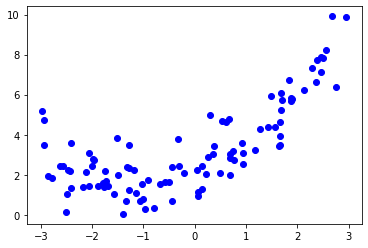

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1)

plt.scatter(X, y, color='blue')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

xx = np.linspace(X.min()-0.1, X.max()+0.1).reshape(-1, 1)
xx

array([[-3.07661061],
       [-2.95148153],
       [-2.82635244],
       [-2.70122336],
       [-2.57609427],
       [-2.45096518],
       [-2.3258361 ],
       [-2.20070701],
       [-2.07557793],
       [-1.95044884],
       [-1.82531976],
       [-1.70019067],
       [-1.57506158],
       [-1.4499325 ],
       [-1.32480341],
       [-1.19967433],
       [-1.07454524],
       [-0.94941616],
       [-0.82428707],
       [-0.69915798],
       [-0.5740289 ],
       [-0.44889981],
       [-0.32377073],
       [-0.19864164],
       [-0.07351256],
       [ 0.05161653],
       [ 0.17674561],
       [ 0.3018747 ],
       [ 0.42700379],
       [ 0.55213287],
       [ 0.67726196],
       [ 0.80239104],
       [ 0.92752013],
       [ 1.05264921],
       [ 1.1777783 ],
       [ 1.30290739],
       [ 1.42803647],
       [ 1.55316556],
       [ 1.67829464],
       [ 1.80342373],
       [ 1.92855281],
       [ 2.0536819 ],
       [ 2.17881099],
       [ 2.30394007],
       [ 2.42906916],
       [ 2

In [ ]:
# 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적

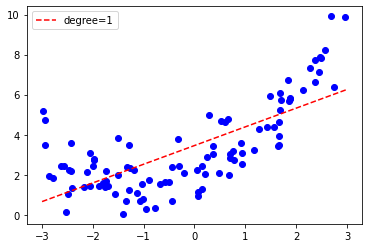

In [10]:
from sklearn.linear_model import LinearRegression

X1_train = X
y_train = y

reg1 = LinearRegression().fit(X1_train, y_train)

xx = np.arange(-3, 3, 0.01)[:, np.newaxis]
yy = reg1.predict(xx)

plt.plot(xx, yy, c='r', ls='--', label='degree=1')
plt.legend()
plt.scatter(X, y, c='b');


In [13]:
X

array([[-0.58786786],
       [-1.03571085],
       [ 0.66784006],
       [-1.50254806],
       [-1.34363986],
       [-1.88598276],
       [-1.51378598],
       [ 1.88963117],
       [-1.97304379],
       [-1.07252298],
       [ 0.04159519],
       [-0.21458347],
       [-2.51915391],
       [-1.97860129],
       [-2.93250343],
       [-0.90388374],
       [-1.79773675],
       [ 2.13142751],
       [ 1.65706919],
       [ 0.25592964],
       [ 2.56585633],
       [-0.29835729],
       [ 1.87336826],
       [-2.97661061],
       [ 0.68321119],
       [-2.41882703],
       [-2.06230841],
       [ 1.86522745],
       [-1.29100818],
       [ 2.36587093],
       [-1.00512535],
       [ 1.26194915],
       [-2.48992786],
       [ 1.17730292],
       [ 0.92999745],
       [-2.47251908],
       [ 2.37664511],
       [-0.68232897],
       [-1.76007823],
       [ 0.60252604],
       [-0.43935127],
       [-1.40658006],
       [ 1.65786795],
       [ 1.64742694],
       [ 0.9313791 ],
       [-1

In [ ]:
# 3) 2차항 형태로 다항 회귀 수행

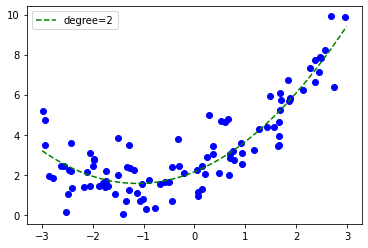

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X2_train = poly.fit_transform(X)
y_train = y

reg2 = LinearRegression().fit(X2_train, y_train)

xx = np.arange(-3, 3, 0.01)[:, np.newaxis]
yy = reg2.predict(poly.transform(xx))

plt.plot(xx, yy, c='g', ls='--', label='degree=2')
plt.scatter(X, y, c='b')
plt.legend();

In [18]:
# 구해진 2차식의 계수 확인
print(reg2.coef_, reg2.intercept_)

[[0.         1.03963828 0.46303805]] [2.14937939]


In [ ]:
# 4) 7차항 형태로 다항회귀 수행

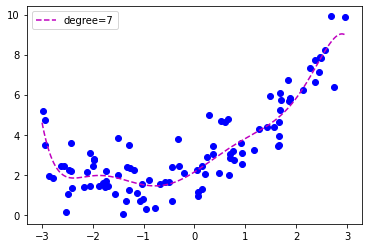

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7)
X7_train = poly.fit_transform(X)
y_train = y

reg7 = LinearRegression().fit(X7_train, y_train)

xx = np.arange(-3, 3, 0.01)[:, np.newaxis]
yy = reg7.predict(poly.transform(xx))

plt.plot(xx, yy, c='m', ls='--', label='degree=7')
plt.scatter(X, y, c='b')
plt.legend();

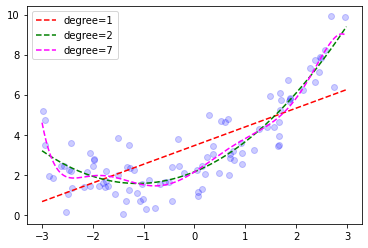

In [20]:
# 각 차수별 그래프와 원본 데이터 비교 시각화
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 2, 7]
colors = ['red', 'green', 'magenta']

plt.scatter(X, y, color='b', alpha=0.2)
for i, d in enumerate(degree): 
    poly = PolynomialFeatures(degree=d)
    X_train = poly.fit_transform(X)
    y_train = y

    reg = LinearRegression().fit(X_train, y_train)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(poly.transform(xx[:, np.newaxis]))

    plt.plot(xx, yy, color=colors[i], linestyle='--',\
             label='degree={}'.format(d))
    plt.legend()
plt.show()  

# pipeline 응용

In [ ]:
# 데이터 변환과정과 머신러닝을 연결해줌

In [ ]:
# 1) degree=2인 모델
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X, y)
xx = np.arange(-3, 3, 0.01)
yy = reg.predict(xx[:, np.newaxis])

plt.plot(xx, yy, color='r', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b', alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# 2) degree = [1, 3, 7]인 모델을 파이프라인으로 변환- 추정 통합

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7]
colors = ['magenta', 'green', 'red']

plt.scatter(X, y, color='b', alpha=0.2)
for i, d in enumerate(degree): 
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression()).fit(X, y)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(xx[:, np.newaxis])

    plt.plot(xx, yy, color=colors[i], linestyle='--', label='degree={}'.format(d))
    plt.legend()
plt.show()  

In [ ]:
# 1, 2, 3, 7 나란히 그리기
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7, 9]
colors = ['magenta', 'green', 'red', 'lime']


fig, ax = plt.subplots(2, 2, figsize=(16, 5))

for i, d in enumerate(degree): 
    #ax = fig.add_subplots(2, 2, i)
    
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression()).fit(X, y)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(xx[:, np.newaxis])
    ax[i].scatter(X, y, color='b', alpha=0.2)
    ax[i].plot(xx, yy, color=colors[i], linestyle='--', label='degree={}'.format(d))
    ax[i].legend()
plt.show()  

# pipeline 실습

In [ ]:
#################
##파이프라인 연습
####################
#다항식으로 데이터를 변환시키고 학습을 연결시키는 파이프라인 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
## 학습용, 검증용 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
#xx = np.linspace(X.min()-0.1, X.max()+0.1).reshape(-1, 1)
xx = np.arange(-3, 3, 0.01).reshape(-1, 1)
degree=[1, 3, 5, 10]

for d in degree:
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    yy = reg.predict(xx)
    r2 = r2_score(y_test, y_pred)
    plt.figure(figsize=(5,5))
    plt.plot(xx, yy, label='degree={}'.format(d))
    plt.scatter(X, y, s=5)
    plt.legend()
    
    # 주석 표시 - 텍스트
    plt.annotate('r2_score: {:.3f} '.format(r2),  #텍스트 입력
                 xycoords= 'axes pixels',
                 xy=(10, 230),            #텍스트 위치 기준점
                 )
    

# [실습 ]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

### 필요한 모듈 import

In [40]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### 데이터 수집

In [41]:
boston = load_boston()

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

#### 데이터 이해

In [42]:
#boston.DESCR
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### 데이터 준비

In [43]:
# 독립변수, 종속변수를 데이터프레임으로 정리

In [44]:
boston.data

array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,
          4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,
          9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,
          4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,
          6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          7.88   ]])

In [45]:
np.set_printoptions(suppress=True)
boston.data[:5]

array([[  0.00632,  18.     ,   2.31   ,   0.     ,   0.538  ,   6.575  ,
         65.2    ,   4.09   ,   1.     , 296.     ,  15.3    , 396.9    ,
          4.98   ],
       [  0.02731,   0.     ,   7.07   ,   0.     ,   0.469  ,   6.421  ,
         78.9    ,   4.9671 ,   2.     , 242.     ,  17.8    , 396.9    ,
          9.14   ],
       [  0.02729,   0.     ,   7.07   ,   0.     ,   0.469  ,   7.185  ,
         61.1    ,   4.9671 ,   2.     , 242.     ,  17.8    , 392.83   ,
          4.03   ],
       [  0.03237,   0.     ,   2.18   ,   0.     ,   0.458  ,   6.998  ,
         45.8    ,   6.0622 ,   3.     , 222.     ,  18.7    , 394.63   ,
          2.94   ],
       [  0.06905,   0.     ,   2.18   ,   0.     ,   0.458  ,   7.147  ,
         54.2    ,   6.0622 ,   3.     , 222.     ,  18.7    , 396.9    ,
          5.33   ]])

In [46]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)['RM'].to_frame()
y = boston.target

In [47]:
# 데이터프레임 확인
print(X)
print(X.values)

        RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211

In [48]:
# 학습용, 검증용 데이터 분할
# test_size=0.3, random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 모델 구축

In [55]:
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
xx = np.linspace(X.min()-1, X.max()+1)  # 방의 갯수 최대값, 최소값
xx

array([[2.561     ],
       [2.70832653],
       [2.85565306],
       [3.00297959],
       [3.15030612],
       [3.29763265],
       [3.44495918],
       [3.59228571],
       [3.73961224],
       [3.88693878],
       [4.03426531],
       [4.18159184],
       [4.32891837],
       [4.4762449 ],
       [4.62357143],
       [4.77089796],
       [4.91822449],
       [5.06555102],
       [5.21287755],
       [5.36020408],
       [5.50753061],
       [5.65485714],
       [5.80218367],
       [5.9495102 ],
       [6.09683673],
       [6.24416327],
       [6.3914898 ],
       [6.53881633],
       [6.68614286],
       [6.83346939],
       [6.98079592],
       [7.12812245],
       [7.27544898],
       [7.42277551],
       [7.57010204],
       [7.71742857],
       [7.8647551 ],
       [8.01208163],
       [8.15940816],
       [8.30673469],
       [8.45406122],
       [8.60138776],
       [8.74871429],
       [8.89604082],
       [9.04336735],
       [9.19069388],
       [9.33802041],
       [9.485

In [56]:
# 단순 선형회귀

reg1 = LinearRegression().fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)

print(reg1.coef_, reg1.intercept_)

yy1 = reg1.predict(xx)

[8.46109164] -30.571032410898336


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
# 2차식의 다항회귀
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X2_train = poly.fit_transform(X_train)
X2_test = poly.transform(X_test)

reg2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = reg2.predict(X2_test)
print(reg2.coef_, reg2.intercept_)

xx2 = PolynomialFeatures(degree=2).fit_transform(xx)
yy2 = reg2.predict(xx2)

[  0.         -23.79086549   2.54284549] 70.45880734716546


In [65]:
# 3차식의 다항회귀
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X3_train = poly.fit_transform(X_train)
X3_test = poly.transform(X_test)

reg3 = LinearRegression().fit(X3_train, y_train)
y_pred3 = reg3.predict(X3_test)
print(reg3.coef_, reg3.intercept_)

xx3 = PolynomialFeatures(degree=3).fit_transform(xx)
yy3 = reg3.predict(xx3)

[   0.         -121.27686495   18.59069233   -0.86283235] 263.6623044802063


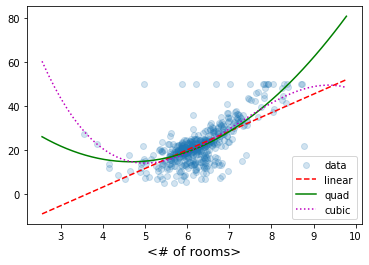

In [66]:
# 데이터 시각화
plt.scatter(X, y,alpha=0.2, label='data')
plt.plot(xx, yy1, c='r', ls='--', label='linear')
plt.plot(xx, yy2, c='g', label='quad')
plt.plot(xx, yy3, c='m', ls=':', label='cubic')

plt.xlabel('<# of rooms>', fontsize=13)
plt.legend(loc='lower right')

#### 모델 성능 평가

In [67]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자
data = { 1 : r2_score(y_test, y_pred1),
         2 : r2_score(y_test, y_pred2),
         3 : r2_score(y_test, y_pred3) }
       
pd.Series(data)


1    0.601577
2    0.667063
3    0.666776
dtype: float64

#  당뇨병 데이터로 다항 회귀 실습

- hint:
- 1) 데이터셋:load_diabetes
- 2) 체질량지수(bmi)를 가지고 단순 선형회귀, 2차, 3차 다항회귀를 수행하고, 가장 적합한 모델을 찾으시오
- 3) 데이터 분할 비율: 0.3, random_state=1
- 4) 차수별 시각화
- 5) 차수별 결정계수 비교

In [17]:
# 1) 데이터프레임으로 만들기


In [ ]:
# 선형 모델 객체 생성


In [ ]:
# 시각화를 위한 xx 좌표축 범위 확정



In [18]:
# 차수별 모형 구축



In [ ]:
# 차수별 시각화

In [ ]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자


# 농어의 길이, 두께, 넓이 데이터를 활용하여 농어의 무게를 예측하는 선형회귀식을 완성하라


* 1) 데이터셋: 입력변수(perch_full.csv), 종속변수(perch_weight)
* 2) 단순선형회귀, 2차 다항회귀, 3차 다항회귀를 각각 수행하고, 가장 r2가 높은 모델을 찾으시오
* 3) 데이터 분할 비율: 0.2, random_state=22

In [ ]:
import pandas as pd
df = pd.read_csv('./data/perch_full.csv')
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# X, y 데이터셋 준비

In [ ]:
#데이터 분할

In [ ]:
# 단순 선형회귀

In [ ]:
#2차 다항회귀

In [ ]:
# 2차 다항회귀를 파이프라인으로 구현

# 3차 다항회귀

# 5차 다항회귀

In [ ]:
# 5차 다항회귀 Pipeline with make_pipeline
from sklearn.pipeline import make_pipeline
reg5_mp = make_pipeline(PolynomialFeatures(degree=5), \
                      LinearRegression())
reg5_mp.fit(X_train, y_train)
y_pred5_mp = reg5_mp.predict(X_test)
print(reg5_mp[1].coef_, reg5_mp[1].intercept_)
r2_score(y_test, y_pred5_mp)
8:35
# 5차 다항회귀 with Pipeline
from sklearn.pipeline import Pipeline
reg5_p = Pipeline([('poly', PolynomialFeatures()), \
                    ('lr', LinearRegression())])
# parameter 설정, ('poly', PolynomialFeatures(degree=5)와 동일
reg5_p.set_params(poly__degree=5)
8:35
reg5_p.fit(X_train, y_train)
y_pred5_p = reg5_p.predict(X_test)
#print(reg5.coef_, reg5.intercept_)
r2_score(y_test, y_pred5_p)

############## 여기까지 ##############